In [115]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Load and Visualize Dataset

In [116]:
# Load dataset
df = pd.read_csv('perceptron_dataset.csv')
print("Dataset Preview:\n", df)
print(df.head())

Dataset Preview:
      IQ  CGPA  Placed
0   131  9.15       1
1    94  8.50       0
2   151  4.49       0
3   140  0.95       0
4   100  3.71       0
..  ...   ...     ...
95  114  0.96       0
96  114  9.41       0
97  112  3.98       0
98   84  5.18       0
99  120  8.38       0

[100 rows x 3 columns]
    IQ  CGPA  Placed
0  131  9.15       1
1   94  8.50       0
2  151  4.49       0
3  140  0.95       0
4  100  3.71       0


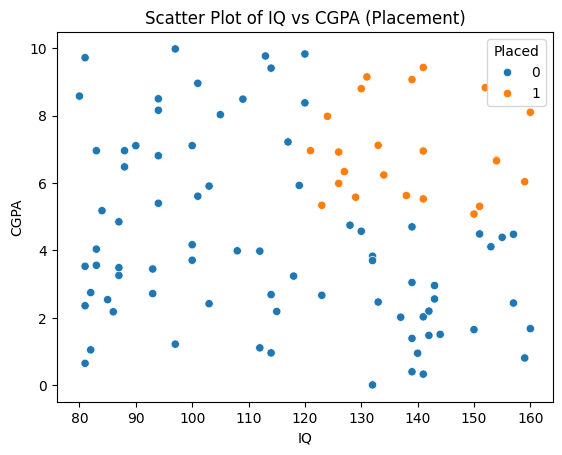

In [117]:
# Initial scatter plot to visualize raw data
sns.scatterplot(x=df['IQ'], y=df['CGPA'], hue=df['Placed'])
plt.title("Scatter Plot of IQ vs CGPA (Placement)")
plt.show()

In [118]:
# Extract features (IQ, CGPA) and labels (Placed)
x = df[['IQ', 'CGPA']]
y = df['Placed']
print("X (features):\n", x)
print("y (labels):\n", y)

X (features):
      IQ  CGPA
0   131  9.15
1    94  8.50
2   151  4.49
3   140  0.95
4   100  3.71
..  ...   ...
95  114  0.96
96  114  9.41
97  112  3.98
98   84  5.18
99  120  8.38

[100 rows x 2 columns]
y (labels):
 0     1
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Placed, Length: 100, dtype: int64


In [119]:
# Scale features to zero mean and unit variance for better convergence
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [120]:
# Add bias term (column of ones) to scaled features
x_scaled_with_bias = np.c_[np.ones(x_scaled.shape[0]), x_scaled]
print("X with bias (scaled):\n", x_scaled_with_bias)

X with bias (scaled):
 [[ 1.          0.47190737  1.58913833]
 [ 1.         -1.03072366  1.34837663]
 [ 1.          1.28414036 -0.13693785]
 [ 1.          0.83741221 -1.4481631 ]
 [ 1.         -0.78705377 -0.42585188]
 [ 1.          1.4059753   0.6779479 ]
 [ 1.          1.4059753   0.66683582]
 [ 1.         -0.66521882  0.38903386]
 [ 1.         -1.51806346 -0.78143839]
 [ 1.         -0.74644212  0.27791308]
 [ 1.          0.51251902 -0.38140357]
 [ 1.         -1.55867511  1.80026782]
 [ 1.         -0.42154892  1.34467261]
 [ 1.         -0.09665573  0.87426129]
 [ 1.         -1.55867511 -0.92589541]
 [ 1.          0.95924716 -0.85181489]
 [ 1.          0.79680056 -1.65188453]
 [ 1.         -0.78705377  0.833517  ]
 [ 1.         -0.29971397 -1.38889868]
 [ 1.          1.44658695 -0.17397811]
 [ 1.          0.71557726 -1.0518323 ]
 [ 1.         -0.74644212  1.51876183]
 [ 1.          0.35007242 -0.04063317]
 [ 1.          0.75618891  0.28532113]
 [ 1.          0.06579087  0.77795661]
 [

### Perceptron Algorithm Definition

In [121]:
# Step function
def step_function(z):
    """
    Applies the step function to a scalar input.
    Returns 1 if z >= 0, else 0.
    """
    return 1 if z >= 0 else 0

In [122]:
def perceptron_trick_learning_algorithm(x, y, epochs=1000, learning_rate=0.01):
    """
    Implements the perceptron trick learning algorithm to find a linear boundary.

    Args:
        x (numpy.ndarray): Feature matrix with bias term (shape: [n_samples, n_features + 1]).
        y (pandas.Series or numpy.ndarray): Target labels (0 or 1, shape: [n_samples]).
        epochs (int, optional): Maximum number of training iterations. Defaults to 1000.
        learning_rate (float, optional): Step size for weight updates. Defaults to 1.0.

    Returns:
        numpy.ndarray: Learned weights (including bias) for the perceptron (shape: [n_features + 1]).

    Logic:
        1. Initialize random weights for all features plus bias.
        2. For each epoch:
           - Shuffle the dataset to ensure random order.
           - For each sample:
             - Compute the weighted sum (dot product of weights and features).
             - Predict using the step function.
             - Calculate the error (true label - predicted label).
             - Update weights: w = w + learning_rate * error * x_i.
           - Track total error across all samples.
           - Stop early if total error is zero (perfect separation).
        3. Return the final weights.
    """

    np.random.seed(42)              # Set random seed for reproducibility
    w = np.random.rand(x.shape[1])  # Initialize weights randomly (bias + features)
    print("Initial weights:", w)

    for epoch in range(epochs):
        total_error = 0
        indices = np.random.permutation(len(x))  # Shuffle indices to process samples in random order
        
        # Iterate over all points
        for idx in indices:
            x_i = x[idx]
            y_i = y[idx]
            
            z = np.dot(x_i, w)          # Compute weighted sum
            y_hat = step_function(z)    # Predict using step function
            error = y_i - y_hat         # Calculate error
            total_error += abs(error)
            
            # Update weights using perceptron trick
            w += learning_rate * error * x_i
        
        # Log progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Total Error: {total_error}")
        
        # Early stopping if no errors (perfectly separated)
        if total_error == 0:
            print(f"Converged at epoch {epoch}")
            break
    
    return w


In [123]:
# Train the perceptron
weights = perceptron_trick_learning_algorithm(x_scaled_with_bias, y, epochs=1000, learning_rate=1.0)
print("\nFinal Weights (including bias):", weights)

# Extract weights
w0, w1, w2 = weights
print(f"Final Weights: w0 (Bias) = {w0}, w1 = {w1}, w2 = {w2}")

Initial weights: [0.37454012 0.95071431 0.73199394]
Epoch 0, Total Error: 21
Epoch 100, Total Error: 17
Epoch 200, Total Error: 15
Epoch 300, Total Error: 19
Epoch 400, Total Error: 18
Epoch 500, Total Error: 19
Epoch 600, Total Error: 18
Epoch 700, Total Error: 21
Epoch 800, Total Error: 19
Epoch 900, Total Error: 19

Final Weights (including bias): [-3.62545988  2.63690999  1.32789767]
Final Weights: w0 (Bias) = -3.6254598811526373, w1 = 2.6369099915301084, w2 = 1.3278976652937322


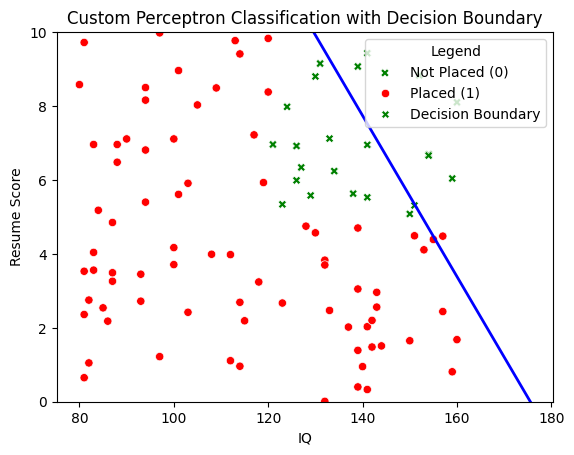

In [124]:
# Scatter plot of original data
sns.scatterplot(x=df["IQ"], y=df["CGPA"], hue=df["Placed"], style=df["Placed"], palette=["red", "green"])

# Calculate decision boundary in original scale
# Adjust weights back to original scale for plotting
w1_orig = w1 / scaler.scale_[0]  # Adjust for IQ scaling
w2_orig = w2 / scaler.scale_[1]  # Adjust for CGPA scaling
w0_orig = w0 - w1 * scaler.mean_[0] / scaler.scale_[0] - w2 * scaler.mean_[1] / scaler.scale_[1]

# Define bounds for CGPA (assuming 0 to 10)
cgpa_min, cgpa_max = 0, 10

# Calculate IQ values at Resume Score boundaries
iq_at_cgpa_0 = (-w0_orig - w2_orig * cgpa_min) / w1_orig
iq_at_cgpa_10 = (-w0_orig - w2_orig * cgpa_max) / w1_orig

x_values = np.array([iq_at_cgpa_0, iq_at_cgpa_10])
y_values = np.array([cgpa_min, cgpa_max])

# Plot decision boundary line
plt.plot(x_values, y_values, 'b-', label='Decision Boundary', linewidth=2)

# Set CGPA limits
plt.ylim(0, 10)

# Labels and title
plt.xlabel("IQ")
plt.ylabel("Resume Score")
plt.title("Custom Perceptron Classification with Decision Boundary")
plt.legend(title="Legend", labels=["Not Placed (0)", "Placed (1)", "Decision Boundary"])
plt.show()


In [125]:
# Calculate accuracy
predictions = [step_function(np.dot(x_i, weights)) for x_i in x_scaled_with_bias]
accuracy = np.mean(predictions == y)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 83.00%
